In [9]:
from cgi import test
from operator import index
from statistics import mean
import tensorflow as tf
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from tensorboard.plugins.hparams import api as hp
from tqdm import tqdm
from lib import pipeline
from lib import data_gen
import numpy as np
import matplotlib.pyplot as plt
import os
import tracemalloc
import shutil

In [18]:
current=[dir for dir in os.listdir("logs/current")]
models=[dir for dir in os.listdir("models")]

wech=set(current).symmetric_difference(models)
for filename in wech:
    shutil.rmtree(f"logs/current/{filename}")

In [12]:
for log_el in current_lst:
    for model_el in model_lst:
        if log_el==model_el:
            pass
        else:
            try:
                shutil.rmtree(f"logs/current/{log_el}")
            except FileNotFoundError:
                print("Error")


Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

In [ ]:
labels_norm=pd.read_csv("C:\\1D_CNN_DATA\\label_norm.csv", header=None)
#Training_data_norm=pd.read_csv("C:\\1D_CNN_DATA\\Training_norm.csv", header=None)

In [ ]:
labels_norm[2]

0         0.216287
1        -0.396109
2        -1.437162
3         0.239709
4        -0.974647
            ...   
999995   -0.720650
999996   -1.420607
999997   -0.242452
999998    1.347259
999999   -0.237950
Name: 2, Length: 1000000, dtype: float64

In [ ]:
Training_data.shape

(100, 100)

In [ ]:
PARAM_SET_OLD={
    "D_MIN": 20,
    "D_MAX": 300,
    "R_MIN": 0,
    "R_MAX": 60,
    "SLD_MIN": 1e-6,
    "SLD_MAX": 16e-6,
    "SUBSTRATE_R": 10,
    "SUBSTRATE_SLD": 16e-6
}
PARAM_SET_NEW={
    "D_MIN": 20,
    "D_MAX": 1000,
    "R_MIN": 0,
    "R_MAX": 100,
    "SLD_MIN": 1e-6,
    "SLD_MAX": 14e-6,
    "SUBSTRATE_R": 10,
    "SUBSTRATE_SLD": 16e-6
}

for name, params in zip(["Old","New"], [PARAM_SET_OLD, PARAM_SET_NEW]):
    print(name, params)

Old {'D_MIN': 20, 'D_MAX': 300, 'R_MIN': 0, 'R_MAX': 60, 'SLD_MIN': 1e-06, 'SLD_MAX': 1.6e-05, 'SUBSTRATE_R': 10, 'SUBSTRATE_SLD': 1.6e-05}
New {'D_MIN': 20, 'D_MAX': 1000, 'R_MIN': 0, 'R_MAX': 100, 'SLD_MIN': 1e-06, 'SLD_MAX': 1.4e-05, 'SUBSTRATE_R': 10, 'SUBSTRATE_SLD': 1.6e-05}


In [ ]:
len(Training_data)

30

In [ ]:
import numpy as np
with open("params.csv","r") as params:
    lines=params.readlines()
    LEN=len(lines)
    lines=lines[int(LEN/2):]
    print(len(lines))

263


In [ ]:
def predict_values(test_data):
    NUM_EX=len(test_data)
    test_data=test_data.reshape(NUM_EX, N_REFL, 1)
    model=tf.keras.models.load_model("model")

    model.build((None, N_REFL, 1))
    return model.predict(test_data)

In [ ]:
test_data=pd.read_csv("pseudo_test_data.csv", header=None)
test_targets=pd.read_csv("pseudo_test_labels.csv", header=None)
test_data=test_data.to_numpy()
pred_lst=predict_values(test_data)

df_labels=pd.read_csv("df_labels.csv")
df_data=pd.read_csv("df_data.csv")

mean_data, std_data=df_data.iloc[0].to_numpy(), df_data.iloc[1].to_numpy()
mean_labels, std_labels=df_labels.iloc[0].to_numpy(), df_labels.iloc[1].to_numpy()


test_data=test_data*std_data+mean_data

test_targets=(test_targets*std_labels)+mean_labels
pred_lst=np.array(pred_lst)
pred_lst=(pred_lst*std_labels)+mean_labels

In [ ]:
pred_lst[:,0]

array([ 521.59715036,   55.7308766 ,  111.24352848,  392.15461439,
        434.07821496,  468.27146268,  890.48762266,  870.24141618,
        560.93471   ,  416.34355064,  465.80036984,  484.96695954,
        265.32196717,  592.02384571,  482.75286247,  475.33373401,
         53.81086331,  132.4618423 ,  565.77640597,  518.5943074 ,
        702.98242971,  467.35157345,  460.66074861,  432.96583418,
        364.7431236 ,  162.24941023,  324.24470396,  725.53012722,
        568.69720685,  643.16349873,  448.71131213,  743.95225297,
        675.30445277,  842.78144399,  551.31825608,  678.25010986,
        361.39563757,  743.60204847,  407.31122198,  544.44981442,
        399.23060583,  526.09166263,  758.65130814,  452.0398788 ,
        551.55637628,  566.6675975 ,  523.69238813,  469.475474  ,
        460.21946579,  483.04991467,  520.52245767,  586.01096573,
        504.19172166,   -9.8313663 ,  791.5952216 ,  818.03223904,
        305.29752465,  299.26988984,  395.01837346,  416.73714

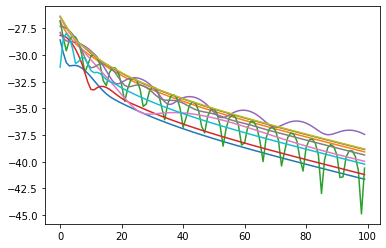

In [ ]:
for i in range(len(test_data)):
    if i%10==0:
        plt.plot(np.log(test_data[i]))

In [ ]:
class noiseLayer(tf.keras.layers.Layer):
    def __init__(self,noise_level):
        super(noiseLayer, self).__init__()
        self.noise_level = noise_level

    def call(self, input):
        noise_level = self.noise_level
        return input + tf.random.uniform(tf.shape(input).numpy(), maxval=noise_level)

In [ ]:
noiseLayer(0.9)([1,2,3])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5754337, 2.193767 , 3.4574192], dtype=float32)>

In [ ]:
d=pred_lst[0][0]
r=pred_lst[0][1]
sld=pred_lst[0][2]


array([5.21597150e+02, 8.57192069e+01, 1.18261139e-05])

In [ ]:
from lib import pipeline

In [ ]:
master_dict=pipeline.build_pipeline(BATCH_SIZE=64, ROOT_DIR="/home/maximilian/Dropbox/Studium/Bachelorarbeit/src",VAL_PERC=0.2)

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from mlreflect.data_generation import Layer, Substrate, AmbientLayer, MultilayerStructure
from mlreflect.training import Trainer
from mlreflect.data_generation import ReflectivityGenerator

Q_MIN=0.01013
Q_MAX=0.13930778
NUM_EX=1000
N_REFL=100
FACTOR_TRAIN_TEST=10
def log_error(y_pred, y):
    return np.mean(np.absolute(np.log10(y_pred)-np.log10(y)))
tracemalloc.start()

def get_curve(N_examples, dict):
    
    substrate = Substrate('Si', dict["SUBSTRATE_R"], dict["SUBSTRATE_SLD"])
    layer2 = Layer('Film', dict["D"], dict["R"], dict["SLD"])
    ambient = AmbientLayer('ambient', 0)

    sample = MultilayerStructure()
    sample.set_substrate(substrate)
    sample.set_ambient_layer(ambient)
    sample.add_layer(layer2)

    q=np.arange(Q_MIN,Q_MAX,(Q_MAX-Q_MIN)/N_REFL)
    trainer = Trainer(sample, q, random_seed=10)
    
    trainer.generate_training_data(N_examples)
    return trainer.training_data["reflectivity"]
@profile
def test_func():
    params_pred_dict={
        "D": 400,
        "R": 40,
        "SLD": 2e-6,
        "SUBSTRATE_R": 10,
        "SUBSTRATE_SLD": 16e-6              #noch fixiert
        }

    R=get_curve(2, params_pred_dict)[0]
    R_true=master_dict["test_d_qs"]
    Error=log_error(R,R_true)
    return Error

In [ ]:
test_func()

/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/mlreflect/data_generation/data_generator.py:36: ImportWarning: Cannot import refl1d package (No module named 'refl1d').
Using builtin Python method.
  warnings.warn(f'Cannot import refl1d package ({error}).\nUsing builtin Python method.', ImportWarning)
100%|██████████| 2/2 [00:00<00:00, 318.20it/s]

/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/google/protobuf/internal/python_message.py:504: size=94.2 KiB (+19.2 KiB), count=931 (+194), average=104 B
/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/google/protobuf/internal/python_message.py:501: size=82.4 KiB (+18.2 KiB), count=742 (+164), average=114 B
/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:393: size=83.8 KiB (+16.8 KiB), count=290 (+58), average=296 B
/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/google/protobuf/internal/python_message.py:1501: size=70.5 KiB (+15.0 KiB), count=1063 (+225), average=68 B
/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/google/protobuf/internal/python_message.py:1230: size=48.9 KiB (+10.4 KiB), count=783 (+167), average=64 B
/home/maximilian/anaconda3/envs/bachelor/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1719: size=48.

In [ ]:
from lib import pipeline

master_dict=pipeline.build_pipeline(BATCH_SIZE=64, ROOT_DIR="/home/maximilian/Dropbox/Studium/Bachelorarbeit/src",VAL_PERC=0.2)

R_true=master_dict["test_d_qs"]
R_pred=
# fig, axs=plt.subplots(5,5,figsize=(15,10), sharex=True, sharey=True)
# fig.suptitle("Ground truth vs. Predicted curves (simulations, no noise, pseudo test)")
# for dir in os.listdir("/home/maximilian/Dropbox/Studium/Bachelorarbeit/src/models"):
#     model=tf.keras.models.load_model("/home/maximilian/Dropbox/Studium/Bachelorarbeit/src/models/"+str(dir))
#     pred_lst_unit_scale=pipeline.predict_values(test_data_unit_scale, model)
    
#     #change scale
#     pred_lst_q_scale=(pred_lst_unit_scale*std_labels)+mean_labels
#     for idx, ax in enumerate(axs.flat):
#         d=pred_lst_q_scale[idx][0]
#         r=pred_lst_q_scale[idx][1]
#         sld=pred_lst_q_scale[idx][2]
#         params={
#         "D": d,
#         "R": r,
#         "SLD": sld,
#         "SUBSTRATE_R": 10,
#         "SUBSTRATE_SLD": 16e-6              #noch fixiert
#         }
#         try:
#             R, _=data_gen.get_curve(2, params)
#         except ValueError:
#             print("There was a negative Value in Data!")
#         ax.semilogy(R[0], label=f"predicted{dir[:4]}", )
#         ax.legend()

# for idx, ax in enumerate(axs.flat):
#     ax.semilogy(test_data_q_scale[idx], label="ground truth")
# plt.tight_layout()
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/maximilian/Dropbox/Studium/Bachelorarbeit/src/training_data.csv'

In [ ]:
import numpy as np
from mlreflect.data_generation import ReflectivityGenerator, noise
from mlreflect.models import DefaultTrainedModel
import pickle

n_samples=10000
# def main():
q_values = DefaultTrainedModel().q_values
sample = DefaultTrainedModel().sample
generator = ReflectivityGenerator(q_values, sample)
labels = generator.generate_random_labels(n_samples)      
reflectivity = generator.simulate_reflectivity(labels)
uniform_noise_range = (0.7, 1.3)
labels=labels.drop(labels.columns.difference(["Film_thickness", "Film_roughness", "Film_sld"]), axis=1)
labels=labels.to_numpy()
#custom normalization of training data
mean_data, std_data=np.mean(reflectivity, axis=0), np.std(reflectivity, axis=0)
mean_labels, std_labels=np.mean(labels, axis=0), np.std(labels, axis=0)
labels=(labels-mean_labels)/std_labels
reflectivity=(reflectivity-mean_data)/std_data

reflectivity=noise.apply_uniform_noise(reflectivity, uniform_noise_range)
np.isfinite(reflectivity).all()


100%|██████████| 10000/10000 [00:01<00:00, 6200.68it/s]


True

In [7]:
n_samples=100
q_values = DefaultTrainedModel().q_values
sample = DefaultTrainedModel().sample
generator = ReflectivityGenerator(q_values, sample)
labels = generator.generate_random_labels(n_samples)
reflectivity = generator.simulate_reflectivity(labels)
#uniform_noise_range = (0.7, 1.3)

labels=labels.drop(labels.columns.difference(["Film_thickness", "Film_roughness", "Film_sld"]), axis=1)
labels=labels.to_numpy()

mean_data, std_data=np.mean(reflectivity, axis=0), np.std(reflectivity, axis=0)
mean_labels, std_labels=np.mean(labels, axis=0), np.std(labels, axis=0)
labels=(labels-mean_labels)/std_labels
reflectivity=(reflectivity-mean_data)/std_data

100%|██████████| 100/100 [00:00<00:00, 3616.34it/s]


100%|██████████| 100/100 [00:00<00:00, 5998.98it/s]


True


/home/maximilian/Dropbox/Studium/Bachelorarbeit/src/lib/pipeline.py:40: RuntimeWarning: invalid value encountered in log10
  return np.nanmean(np.absolute(np.log10(y_pred)-np.log10(y)))


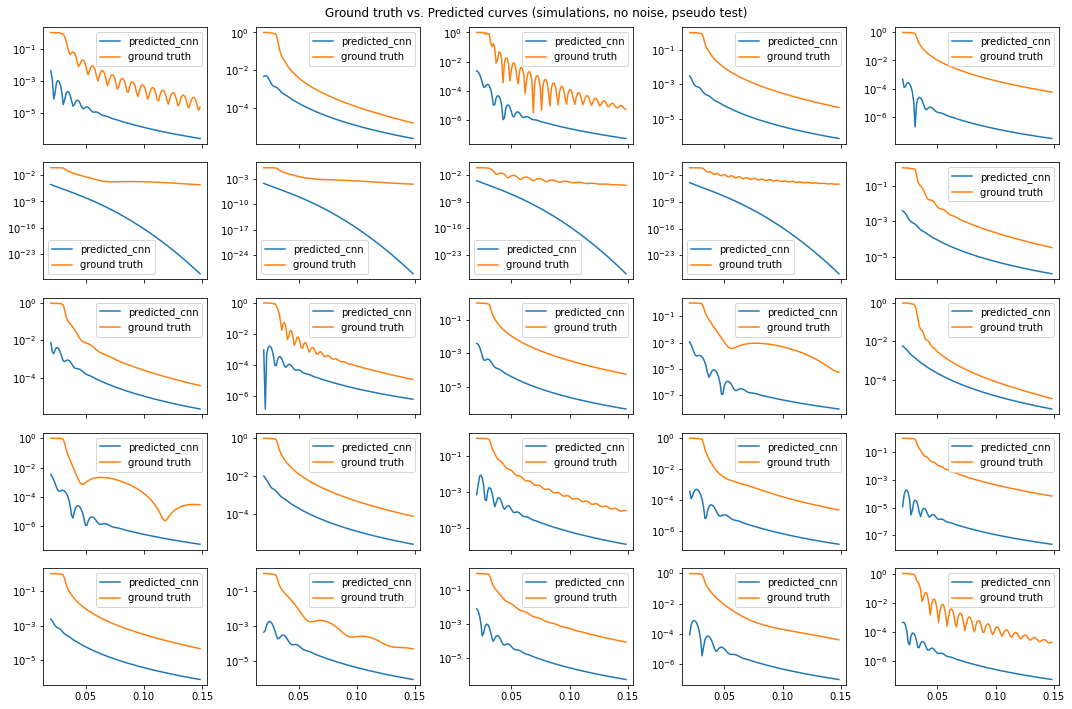

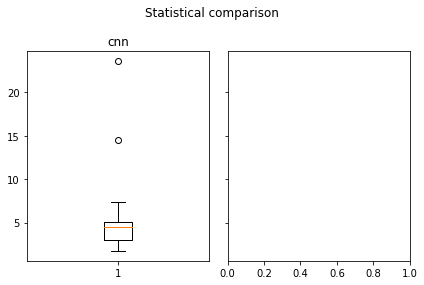

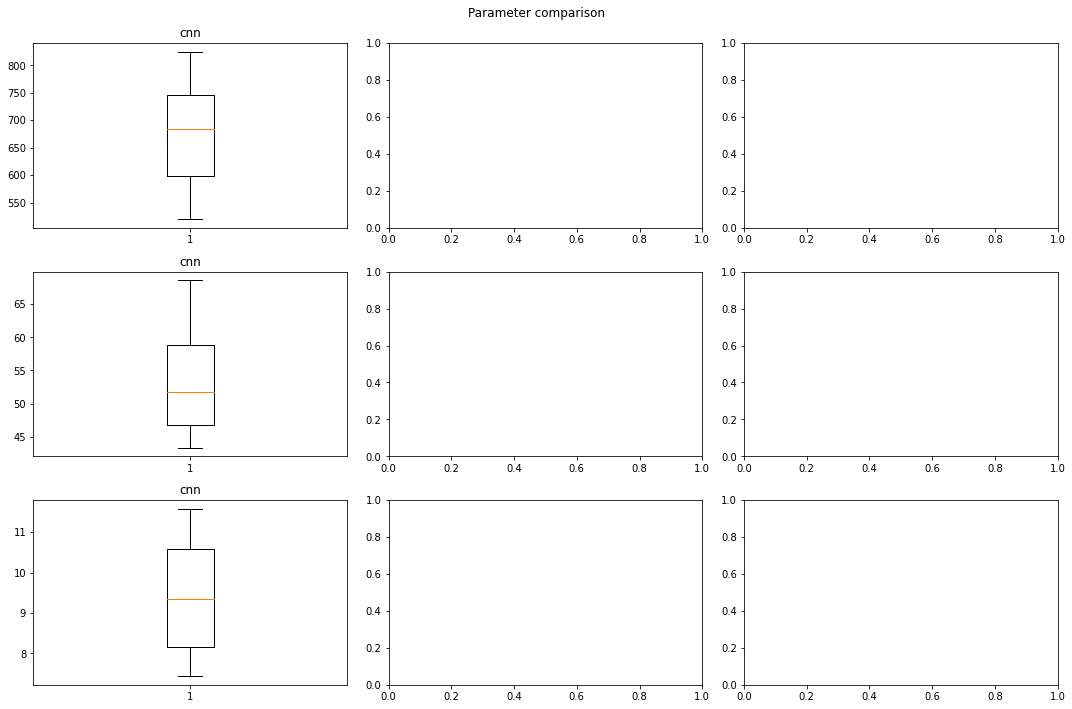

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from lib import pipeline
from mlreflect.models import DefaultTrainedModel, TrainedModel
import pickle
from mlreflect.data_generation import ReflectivityGenerator
import tensorflow as tf
from tensorflow import keras
test_number_of_curves=100
test_values_per_curve=109

fig, axs=plt.subplots(5,5,figsize=(15,10), sharex=True)#, sharey=True)
fig_boxplot, axs_boxplot=plt.subplots(1,2, sharey=True)
fig_boxplots_param, axs_boxplots_param=plt.subplots(3,3, figsize=(15,10))
#Hier oben
fig_boxplots_param.suptitle("Parameter comparison")


fig.suptitle("Ground truth vs. Predicted curves (simulations, no noise, pseudo test)")
fig_boxplot.suptitle("Statistical comparison")
    
for idx_model, modelname in enumerate(["cnn"]):
    error_lst=[]
    with open(f'./evaluation/test_data', 'rb') as inp:
        generator, (reflectivity_true, lables_test, mean_data, std_data, mean_labels_test, std_labels_test) = pickle.load(inp)
    reflectivity_true_q_scale=reflectivity_true*std_data+mean_data

    if modelname=="mlp":
        reflectivity_true=reflectivity_true.reshape(test_number_of_curves, test_values_per_curve)
        model=DefaultTrainedModel().keras_model
        pred_params_unit_scale=model.predict(reflectivity_true) #different scaling while training?
    else:
        model=keras.models.load_model('models/0.2_60_15_30_16_8_20220609-104729')
        reflectivity_true=reflectivity_true.reshape(test_number_of_curves, test_values_per_curve, 1)
        #test_dataset_unit_scale=tf.data.Dataset.from_tensor_slices((reflectivity_true, lables_test)).batch(64)
        pred_params_unit_scale=model.predict(reflectivity_true)
    pred_params_q_scale=pred_params_unit_scale*std_labels_test+mean_labels_test
    pred_params_q_scale=pd.DataFrame(pred_params_q_scale, columns=["thickness", "roughness", "sld"])
    #Andere Parameter fehlen
    q_values = DefaultTrainedModel().q_values
    sample = DefaultTrainedModel().sample
    generator_new=ReflectivityGenerator(q_values, sample)
    reflectivity_sim = generator_new.simulate_reflectivity(pred_params_q_scale)
    bool=np.isfinite(reflectivity_sim).all()
    print(bool)
    for i, param in enumerate(["thickness","roughness","sld"]):
        axs_boxplots_param[i,idx_model].boxplot(pred_params_q_scale.to_numpy()[:,i])
        axs_boxplots_param[i,idx_model].set_title(f"{modelname}")
        
        if modelname=="mlp":
            axs_boxplots_param[i,2].boxplot(lables_true_q_scale[:,i])
            axs_boxplots_param[i,2].set_title("ground truth")
    for idx_lineplot, ax in enumerate(axs.flat):
        ax.semilogy(q_values,reflectivity_sim[idx_lineplot], label=f"predicted_{modelname}")
        ax.legend()
    fig.tight_layout()
for curve_true, curve_sim in zip(reflectivity_true, reflectivity_sim):
    curve_true=curve_true.reshape(test_values_per_curve)
    error_lst.append(pipeline.log_error(curve_true, curve_sim))
arr=np.array(error_lst)
#arr=arr[~np.isnan(arr)]
for idx, ax in enumerate(axs.flat):
    ax.semilogy(q_values, reflectivity_true_q_scale[idx], label="ground truth")
    ax.legend()
axs_boxplot[idx_model].boxplot(arr)
axs_boxplot[idx_model].set_title(f"{modelname}")

fig_boxplot.tight_layout()
fig_boxplots_param.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4135.71it/s]


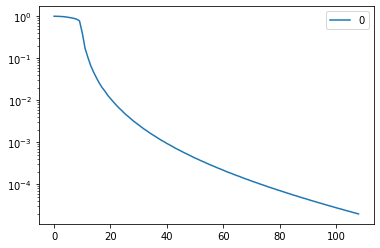

In [5]:
n_samples_test=1000
import numpy as np
from mlreflect.data_generation import ReflectivityGenerator, noise
from mlreflect.models import DefaultTrainedModel
from mlreflect.training import InputPreprocessor, OutputPreprocessor, NoiseGenerator
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

q_values = DefaultTrainedModel().q_values
sample = DefaultTrainedModel().sample
generator = ReflectivityGenerator(q_values, sample)
labels = generator.generate_random_labels(n_samples_test)
ip=InputPreprocessor()
out=OutputPreprocessor(sample)
for i in range(2):
    if i==0:
        reflectivity = generator.simulate_reflectivity(labels)
    if i==1:
        with open("evaluation/object", "wb") as output:
            pickle.dump([generator, labels], output, pickle.HIGHEST_PROTOCOL)
        with open("evaluation/object", "rb") as inp:
            gen_test, labels = pickle.load(inp)
        reflectivity = gen_test.simulate_reflectivity(labels)

    plt.semilogy(reflectivity[0], label=f"{i}")
plt.legend()